In [13]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

iris = datasets.load_iris()

In [14]:
def plot_clusters(data, lables, title):
  colors = ['red', 'green', 'purple', 'black']
  plt.figure(figsize= (8,4))

  for i, c, l in zip(range(-1, 3), colors, ['Noise', 'Setosa', 'Versicolor', 'Virginica']):
    if i == -1:
      plt.scatter(data[lables == i, 0], data[lables == i, 3], c=colors[i], label = l, alpha = 0.5, s = 50, marker = 'x')
    else:
      plt.scatter(data[lables == i, 0], data[lables == i, 3], c=colors[i], label = l, alpha = 0.5, s = 50)

    plt.legend()
    plt.title(title)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.show()

In [15]:
#iris

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


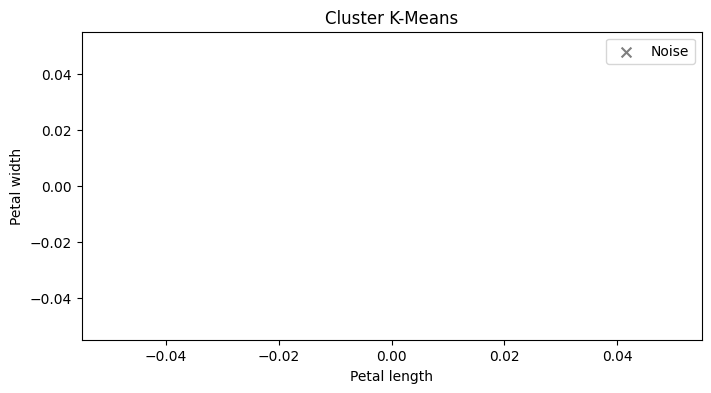

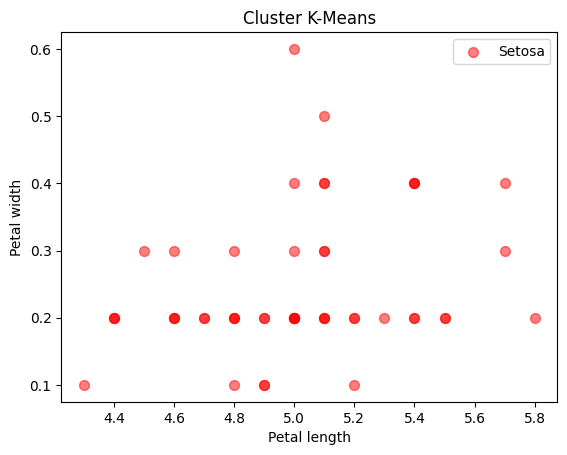

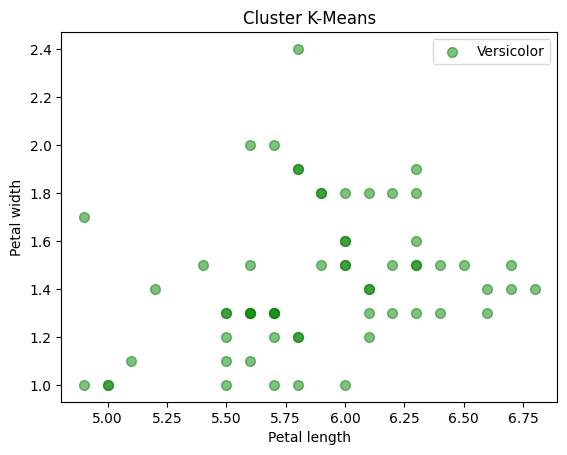

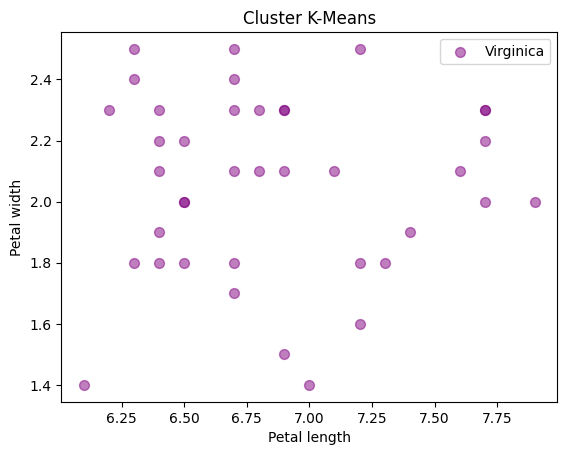

In [16]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris.data)

print(kmeans.labels_)

resultados = confusion_matrix(iris.target, kmeans.labels_)
print(resultados)

plot_clusters(iris.data, kmeans.labels_, 'Cluster K-Means')

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


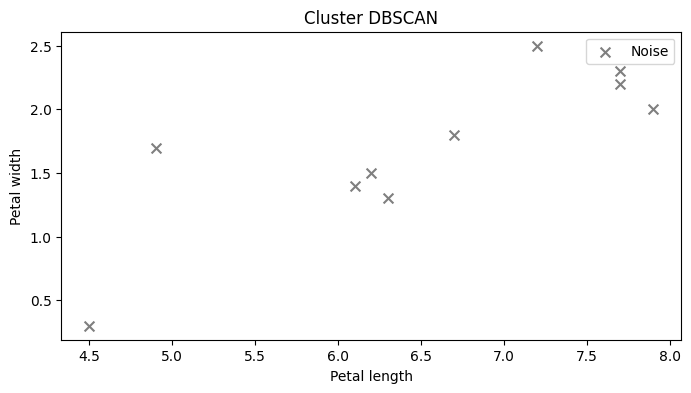

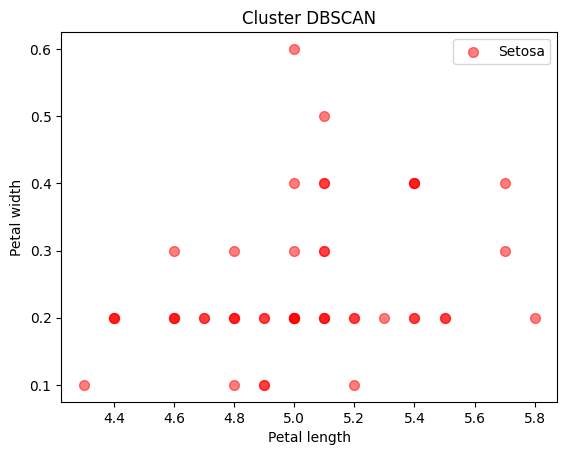

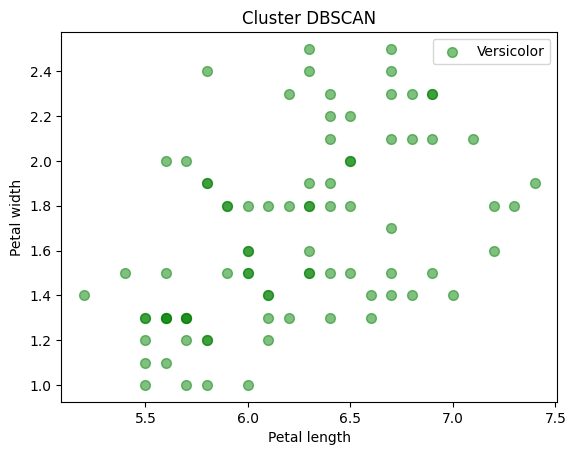

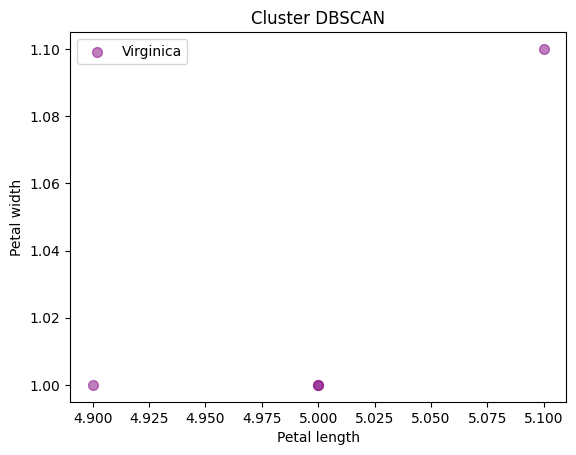

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(iris.data)

print(dbscan.labels_) #ruido = elemento não agrupado

plot_clusters(iris.data, dbscan_labels, 'Cluster DBSCAN')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


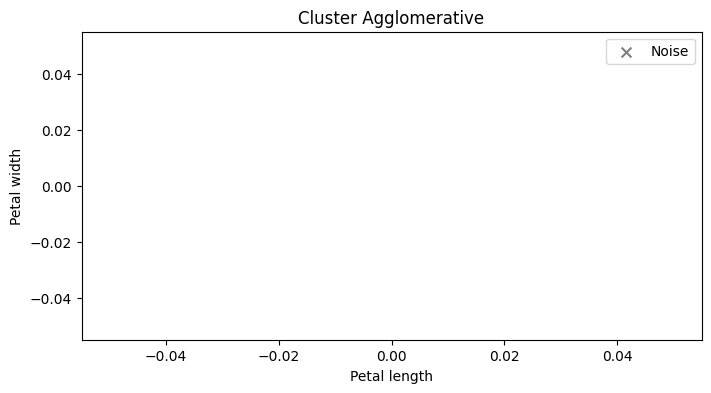

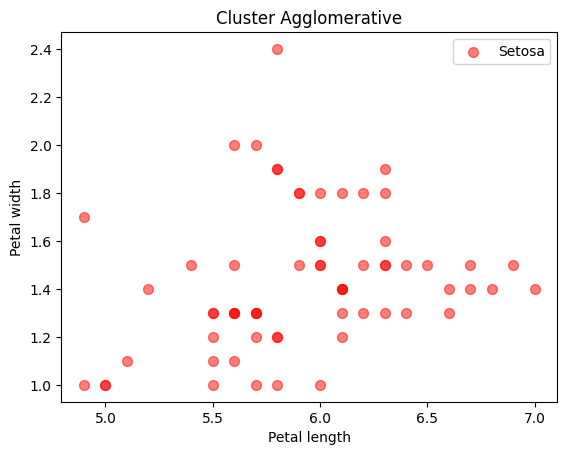

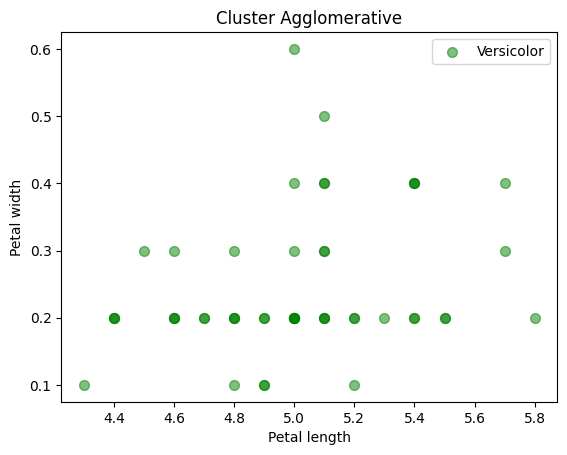

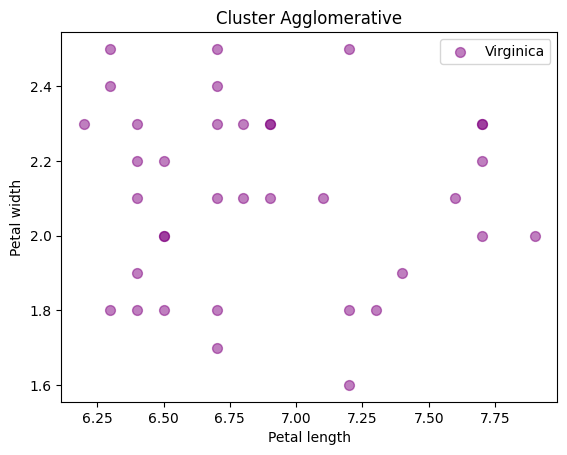

In [21]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(iris.data)

print(agglo.labels_)

plot_clusters(iris.data, agglo_labels, 'Cluster Agglomerative')

In [19]:
resultados = confusion_matrix(iris.target, agglo_labels)
print(resultados)

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


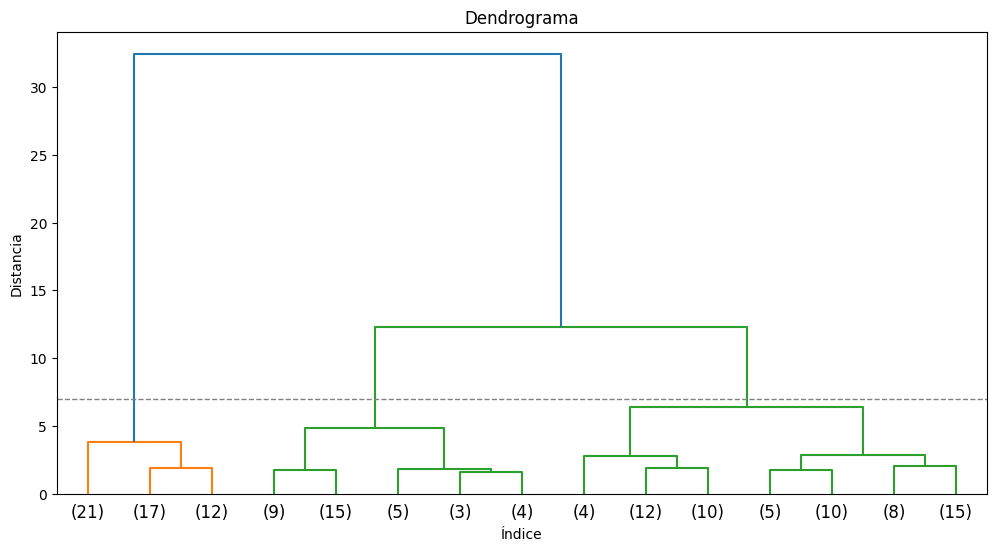

In [25]:
plt.figure(figsize=(12, 6))
plt.title('Dendrograma')
plt.xlabel('Índice')
plt.ylabel('Distancia')
linkage_matrix = linkage(iris.data, method= 'ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.axhline(y=7, c='gray', lw=1, linestyle='dashed')
plt.show()